In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define params and helpers

In [4]:
data_dir = 'data'
raw_data_path = 'raw_data.csv'

In [5]:
# Load data

In [6]:
df = pd.read_csv(os.path.join(data_dir, raw_data_path))

In [7]:
df[:10]

,HN,Name,OperationDate,Implant size,PreOp-SNR,PreOp-SNL,PreOp-CNR,PreOp-CNL,PreOp-BWR,PreOp-BWL,...,PostOp-BWL,PostOp-BHR,PostOp-BHL,PostOp-IMFR,PostOp-IMFL,PostOp-AreRW,PostOp-AreRH,PostOp-AreLW,PostOp-AreLH,PostOp-ID
0,649392,จีระพร,25-Nov-16,275,15.0,15.0,13.5,13.5,12.4,12.4,...,11.9,12.7,12.7,8.0,8.0,2.8,2.8,2.8,2.8,0.5
1,5102732,ลักขณา,18-Nov-16,275,18.5,18.5,17.5,17.5,12.6,12.6,...,12.5,13.0,13.0,8.0,8.0,3.0,2.5,3.0,2.5,1.5
2,630569,ชลธิชา,26-Aug-16,275,16.0,16.0,14.0,13.5,12.0,12.0,...,11.8,12.0,12.0,7.5,9.0,3.0,2.5,3.0,2.5,1.5
3,634270,ทิพสุคนธ์,24-Sep-16,275,16.0,16.0,15.0,14.5,13.0,13.0,...,13.1,13.5,13.5,6.5,6.5,3.5,3.5,3.5,2.5,1.0
4,646980,ชนัญญา,28-Oct-16,300,17.5,17.5,16.5,16.5,12.0,12.0,...,12.7,13.3,13.3,7.5,8.5,3.0,3.0,3.0,3.0,0.5
5,617075,รินทร์ลภัส,24-Sep-16,300,17.0,17.0,16.0,16.0,13.0,13.0,...,13.3,14.2,14.2,9.0,10.0,4.0,4.0,4.0,4.0,0.1
6,648612,อริสา,22-Dec-16,300,15.5,15.5,14.0,14.0,12.4,12.4,...,12.7,13.0,13.0,8.5,9.0,3.5,3.5,3.5,3.5,0.5
7,608425,ปราณปรียา,28-Dec-15,300,17.5,17.0,15.5,14.5,12.5,12.8,...,12.8,14.0,14.0,8.0,9.0,3.8,3.5,3.5,3.5,0.5
8,624115,นิศานาถ,18-Jul-16,300,18.0,17.0,16.0,15.0,13.0,13.0,...,12.3,12.7,12.7,8.0,8.5,3.2,3.0,3.5,3.0,1.0
9,313707,เบญจมาศ,19-Aug-16,325,16.5,16.5,15.5,15.5,12.8,12.8,...,13.0,13.7,13.7,8.0,8.0,3.0,3.0,3.0,3.0,0.1


In [8]:
# Show Implant Size
im_sizes = list(set([size for size in df['Implant size'].values]))
print(im_sizes)

['300R 325L', 'CPG322-255', '250R 275L', 'CPG323-345', '275', '400', 'CPG322-330', 'CPG-322', '225', '500', '345', 'CPG323', '322R 330L', '325R 300', '300R 250L', '400R 375L', '300', '425R 350L', '295', '325', 'CPG322-295', '250', '200R 275L', '250R 300L', '375', '300R 275L', '450', '350R 325L', 'CPG332-305', '350']


In [13]:
# Count 
cp_count = 0
hp_same_size_count = 0
hp_count = 0
        
for size in df['Implant size'].values:
    if 'CPG' in size:
        cp_count += 1
    elif 'L' in size or 'R' in size:
        hp_count += 1
    else:
        hp_same_size_count += 1

([<matplotlib.axis.XTick at 0x17aa4446e10>,
 <a list of 3 Text xticklabel objects>)

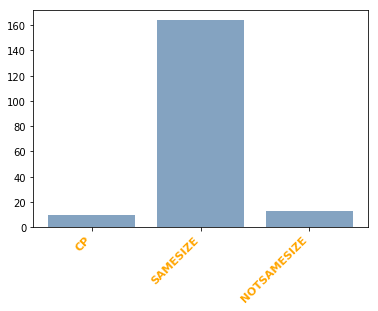

In [24]:
bars = ('CP', 'SAMESIZE', 'NOTSAMESIZE')
height = [cp_count, hp_same_size_count, hp_count]

y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, color='orange', rotation=45, fontweight='bold', fontsize='11', horizontalalignment='right')

In [32]:
# Count unique HP profiles
im_sizes_hp = list(set([size for size in df['Implant size'].values if 'CP' not in size]))
im_sizes_hp.sort()
print(im_sizes_hp)

['200R 275L', '225', '250', '250R 275L', '250R 300L', '275', '295', '300', '300R 250L', '300R 275L', '300R 325L', '322R 330L', '325', '325R 300', '345', '350', '350R 325L', '375', '400', '400R 375L', '425R 350L', '450', '500']


In [33]:
count_dict = {}
for size in im_sizes_hp:
    count = 0
    for val in df['Implant size'].values:
        if val == size:
            count += 1
    count_dict[size] = count

In [34]:
count_dict

{'200R 275L': 1,
 '225': 1,
 '250': 7,
 '250R 275L': 1,
 '250R 300L': 2,
 '275': 16,
 '295': 1,
 '300': 18,
 '300R 250L': 1,
 '300R 275L': 1,
 '300R 325L': 1,
 '322R 330L': 1,
 '325': 47,
 '325R 300': 1,
 '345': 1,
 '350': 39,
 '350R 325L': 2,
 '375': 25,
 '400': 7,
 '400R 375L': 1,
 '425R 350L': 1,
 '450': 1,
 '500': 1}